<a href="https://colab.research.google.com/github/Mounika-Alwar/Sentiment-Analysis/blob/main/AMAZON_SENTIMENT_ANALYSIS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#importing necessary libraries
!pip install seaborn
#!pip install wordcloud
import pandas as pd
import numpy as np
#import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import re
import nltk
from nltk.stem.porter import PorterStemmer
nltk.download('stopwords')
from nltk.corpus import stopwords
STOPWORDS=set(stopwords.words('english'))
import string
import pickle
import os

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import RandomizedSearchCV

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\mouni\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
import zipfile
import pandas as pd

zip_file_path = 'C:\\Users\\mouni\\Downloads\\archive.zip'
extract_path = 'C:\\Users\\mouni\\Downloads\\archive'

with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

tsv_file_path = 'C:\\Users\\mouni\\Downloads\\archive\\amazon_alexa.tsv'
df = pd.read_csv(tsv_file_path, sep='\t')

df.head()

,rating,date,variation,verified_reviews,feedback
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1
4,5,31-Jul-18,Charcoal Fabric,Music,1


## Exploratory Data Analysis

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3150 entries, 0 to 3149
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   rating            3150 non-null   int64 
 1   date              3150 non-null   object
 2   variation         3150 non-null   object
 3   verified_reviews  3149 non-null   object
 4   feedback          3150 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 123.2+ KB


In [ ]:
df.describe()

,rating,feedback
count,3150.000000,3150.000000
mean,4.463175,0.918413
std,1.068506,0.273778
min,1.000000,0.000000
25%,4.000000,1.000000
50%,5.000000,1.000000
75%,5.000000,1.000000
max,5.000000,1.000000


In [ ]:
df['verified_reviews']=df['verified_reviews'].apply(lambda x: x if isinstance(x, str) else '')
df['length'] = df['verified_reviews'].apply(len)

In [ ]:
df.head()

,rating,date,variation,verified_reviews,feedback,length
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1,13
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1,9
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1,195
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1,172
4,5,31-Jul-18,Charcoal Fabric,Music,1,5


### Analysing Rating Column

In [ ]:
df['rating'].value_counts()

rating
5    2286
4     455
1     161
3     152
2      96
Name: count, dtype: int64

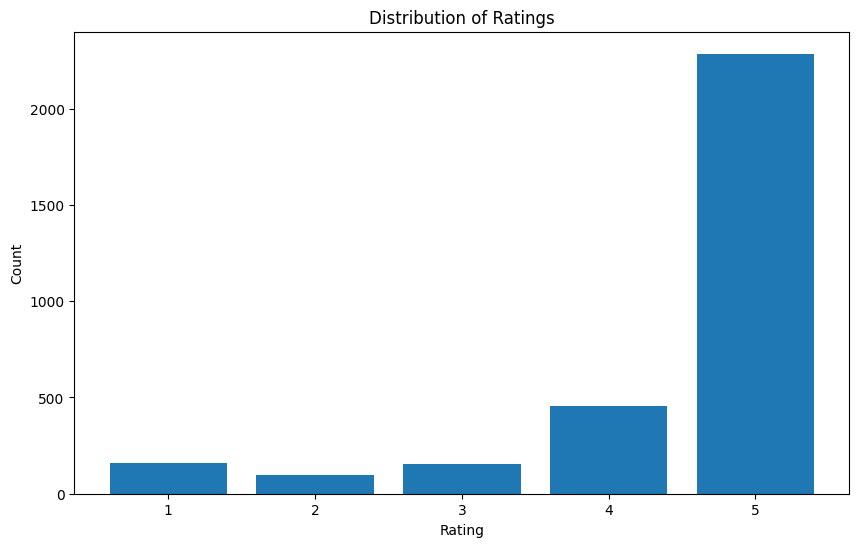

In [ ]:
rating_counts = df['rating'].value_counts().sort_index()

plt.figure(figsize=(10, 6))
plt.bar(rating_counts.index, rating_counts.values)
plt.xlabel('Rating')
plt.ylabel('Count')
plt.title('Distribution of Ratings')
plt.show()

There are more 5 star reviews, almost 73% of reviews are 5 star reviews.

### Analysing Date Column

In [ ]:
#convert date to datetime format

df['date']=pd.to_datetime(df['date'])

C:\Users\mouni\AppData\Local\Temp\ipykernel_17068\2221393049.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['date']=pd.to_datetime(df['date'])


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3150 entries, 0 to 3149
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   rating            3150 non-null   int64         
 1   date              3150 non-null   datetime64[ns]
 2   variation         3150 non-null   object        
 3   verified_reviews  3150 non-null   object        
 4   feedback          3150 non-null   int64         
 5   length            3150 non-null   int64         
dtypes: datetime64[ns](1), int64(3), object(2)
memory usage: 147.8+ KB


In [ ]:
df['date'].value_counts().sort_index()

date
2018-05-16       5
2018-05-17       7
2018-05-18       3
2018-05-19       5
2018-05-20       5
              ... 
2018-07-27      38
2018-07-28     250
2018-07-29     482
2018-07-30    1603
2018-07-31      81
Name: count, Length: 77, dtype: int64

Text(0, 0.5, 'Number of Reviews')

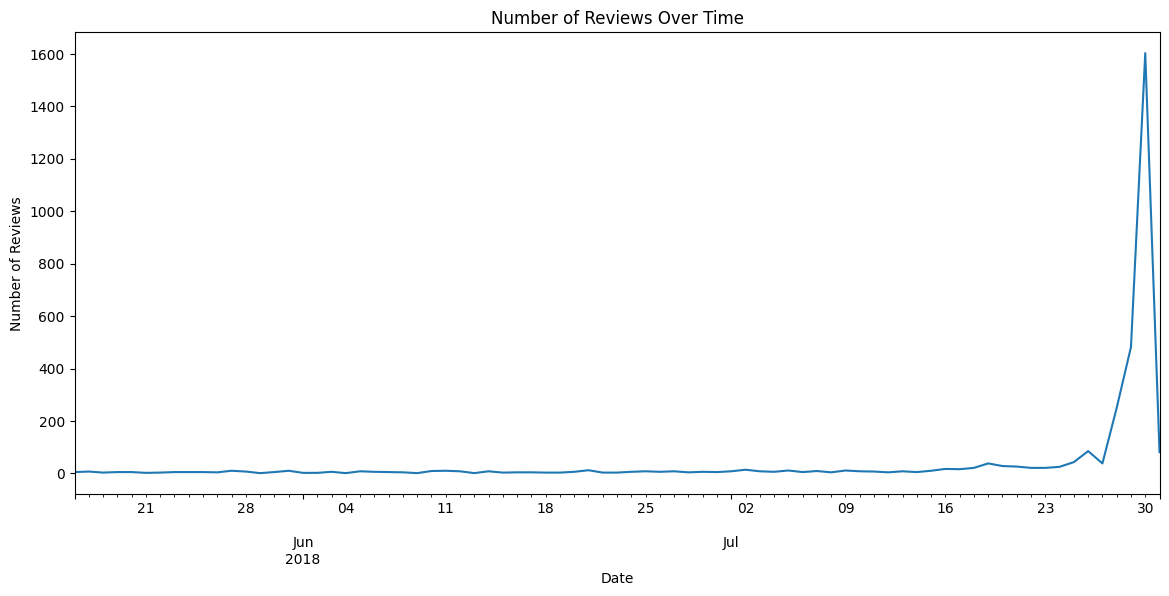

In [ ]:
plt.figure(figsize=(14, 6))
df['date'].value_counts().sort_index().plot()
plt.title('Number of Reviews Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Reviews')



People started to give more reviews almost from mid july of 2018.

Maximum numbers of reviews were given on '2018-07-30' and,

Again reviews fell down drastically on day '2018-07-31'.

### Analysing Variation Column

In [ ]:
df['variation'].value_counts()

variation
Black  Dot                      516
Charcoal Fabric                 430
Configuration: Fire TV Stick    350
Black  Plus                     270
Black  Show                     265
Black                           261
Black  Spot                     241
White  Dot                      184
Heather Gray Fabric             157
White  Spot                     109
White                            91
Sandstone Fabric                 90
White  Show                      85
White  Plus                      78
Oak Finish                       14
Walnut Finish                     9
Name: count, dtype: int64

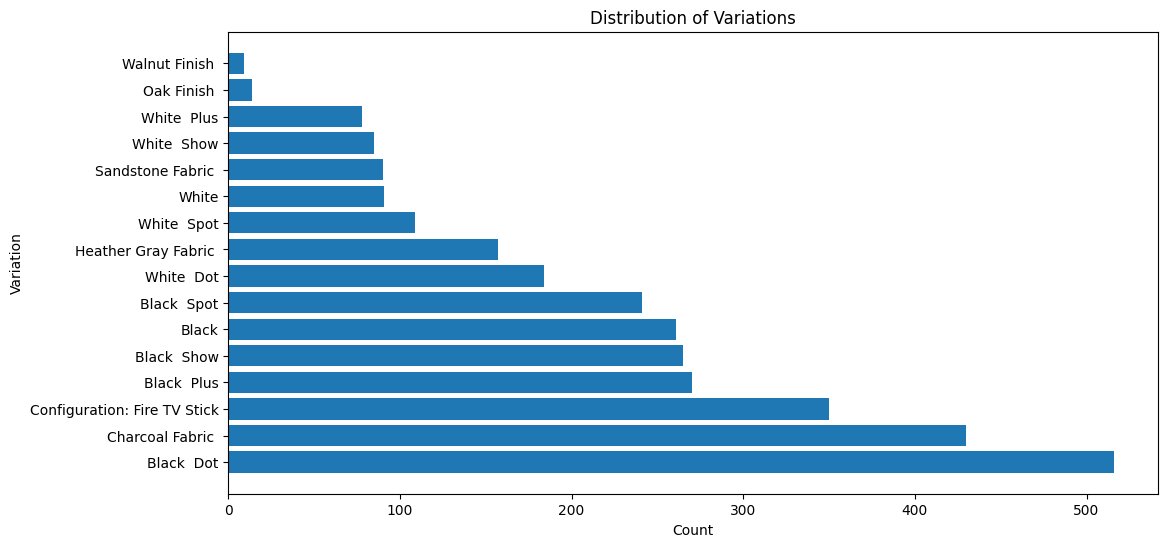

In [ ]:
variation_counts = df['variation'].value_counts()

plt.figure(figsize=(12, 6))
plt.barh(variation_counts.index, variation_counts.values)
plt.xlabel('Count')
plt.ylabel('Variation')
plt.title('Distribution of Variations')
plt.show()

Seems like maximum reviews were given on Black Dot variation of alexa. Followed by Charcoal Fabric, Configuration: Fire TV Stick, so on...

### Analysing Feedback Column

In [ ]:
df['feedback'].value_counts()

feedback
1    2893
0     257
Name: count, dtype: int64

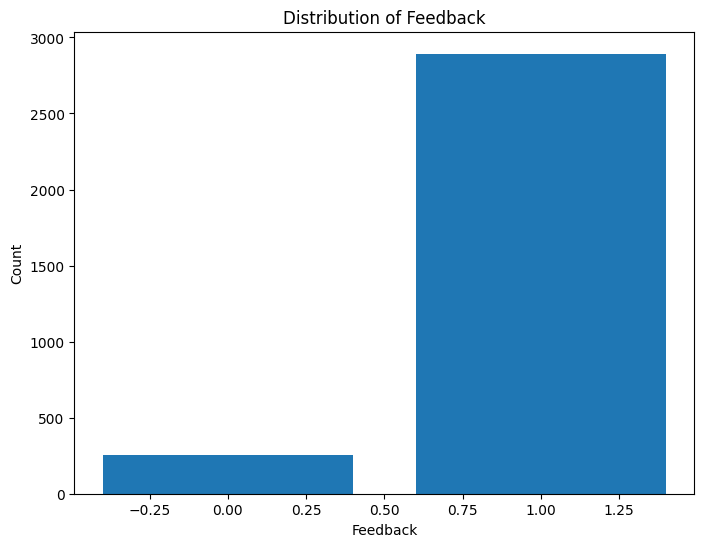

In [ ]:
feedback_counts = df['feedback'].value_counts()

plt.figure(figsize=(8, 6))
plt.bar(feedback_counts.index, feedback_counts.values)
plt.xlabel('Feedback')
plt.ylabel('Count')
plt.title('Distribution of Feedback')
plt.show()

This shows that there are more positive feedbacks.

And also, all the 3,4,5 star ratings are marked as feedback 1, and all the 1,2 star ratings are marked as feedback 0.

### Analysing length column

<Axes: >

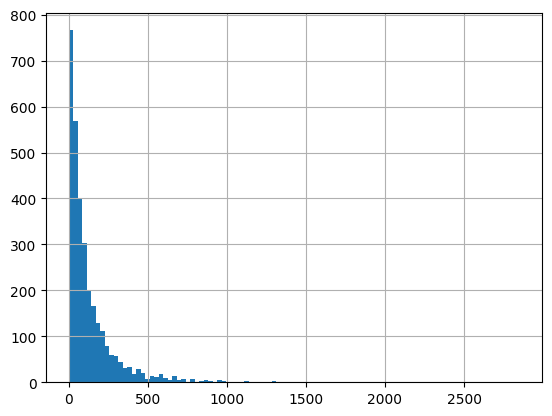

In [ ]:
df['length'].hist(bins=100)

There are more reviews with less number almost zero length.

### Correlation among Numerical features

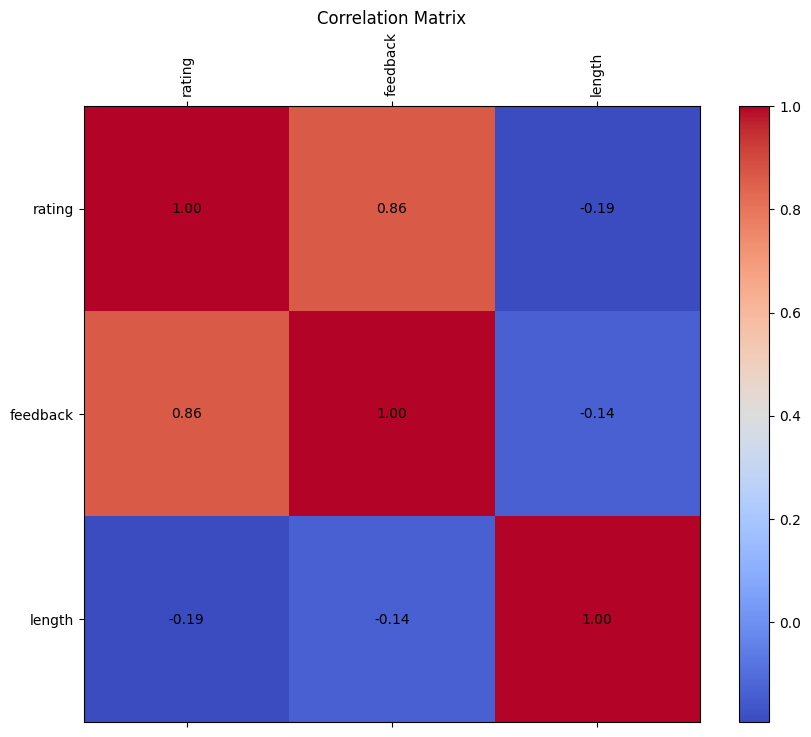

In [ ]:
numeric_df = df.select_dtypes(include=[np.number])

corr_matrix = numeric_df.corr()

fig, ax = plt.subplots(figsize=(10, 8))

cax = ax.matshow(corr_matrix, cmap='coolwarm')

fig.colorbar(cax)

plt.xticks(range(len(corr_matrix.columns)), corr_matrix.columns, rotation=90)
plt.yticks(range(len(corr_matrix.columns)), corr_matrix.columns)

for i in range(len(corr_matrix.columns)):
    for j in range(len(corr_matrix.columns)):
        plt.text(j, i, f"{corr_matrix.iloc[i, j]:.2f}", ha='center', va='center', color='black')

plt.title('Correlation Matrix')
plt.show()

There is high positive correlation between feedback and rating. As feedback is obtained from rating column.

There is weak negative correlation between rating and length, indicating a slight tendency for higher-rated reviews to be shorter.

There is weak negative correlation between feedback and length, suggesting that positive feedback is slightly associatd with shorter reviews.

### Analysing verified_reviews Column

#### Analysing verified_reviews for positive feedback

In [ ]:
positive_review=df[df['feedback']==1]
positive_review

,rating,date,variation,verified_reviews,feedback,length
0,5,2018-07-31,Charcoal Fabric,Love my Echo!,1,13
1,5,2018-07-31,Charcoal Fabric,Loved it!,1,9
2,4,2018-07-31,Walnut Finish,"Sometimes while playing a game, you can answer...",1,195
3,5,2018-07-31,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1,172
4,5,2018-07-31,Charcoal Fabric,Music,1,5
...,...,...,...,...,...,...
3145,5,2018-07-30,Black Dot,"Perfect for kids, adults and everyone in betwe...",1,50
3146,5,2018-07-30,Black Dot,"Listening to music, searching locations, check...",1,135
3147,5,2018-07-30,Black Dot,"I do love these things, i have them running my...",1,441
3148,5,2018-07-30,White Dot,Only complaint I have is that the sound qualit...,1,380


In [ ]:
positive_sentences=positive_review['verified_reviews'].tolist()
type(positive_sentences)

list

In [ ]:
positive_sentences_as_one_string=" ".join(positive_sentences)
type(positive_sentences_as_one_string)

str

In [ ]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [ ]:
STOPWORDS

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 "he'd",
 "he'll",
 "he's",
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 "i'd",
 "i'll",
 "i'm",
 "i've",
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it'd",
 "it'll",
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'on

In [ ]:
#lets remove punctuations, stopwords from positive reviews

pos_punc_removed=[char for char in positive_sentences_as_one_string if char not in string.punctuation]
pos_punc_removed_string="".join(pos_punc_removed)
pos_stopwords_removed=[char for char in pos_punc_removed_string.split() if char.lower() not in stopwords.words('english')]

In [ ]:
type(pos_stopwords_removed)

list

In [ ]:
pos_clean_string=" ".join(pos_stopwords_removed)
type(pos_clean_string)

str

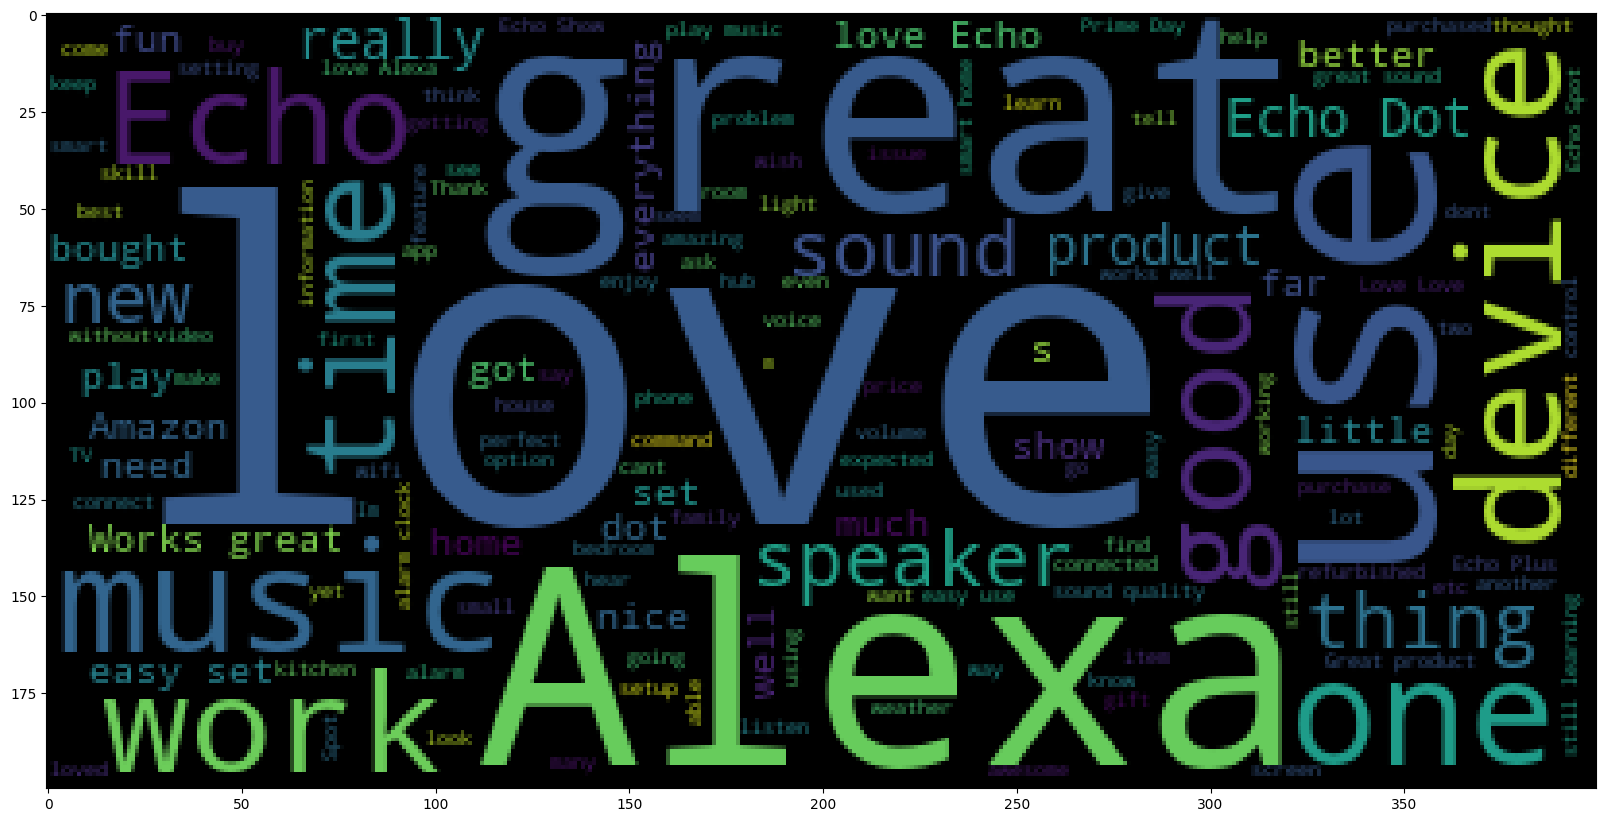

In [ ]:
plt.figure(figsize=(20,20))
plt.imshow(WordCloud().generate(pos_clean_string))

Most commonly used words in positive feedback are Love, device, great, Alexa, music...

#### Analysing verified_reviews for negative feedback

In [ ]:
negative_review=df[df['feedback']==0]
negative_review

,rating,date,variation,verified_reviews,feedback,length
46,2,2018-07-30,Charcoal Fabric,"It's like Siri, in fact, Siri answers more acc...",0,163
111,2,2018-07-30,Charcoal Fabric,Sound is terrible if u want good music too get...,0,53
141,1,2018-07-30,Charcoal Fabric,Not much features.,0,18
162,1,2018-07-30,Sandstone Fabric,"Stopped working after 2 weeks ,didn't follow c...",0,87
176,2,2018-07-30,Heather Gray Fabric,Sad joke. Worthless.,0,20
...,...,...,...,...,...,...
3047,1,2018-07-30,Black Dot,Echo Dot responds to us when we aren't even ta...,0,120
3048,1,2018-07-30,White Dot,NOT CONNECTED TO MY PHONE PLAYLIST :(,0,37
3067,2,2018-07-30,Black Dot,The only negative we have on this product is t...,0,240
3091,1,2018-07-30,Black Dot,I didn’t order it,0,17


In [ ]:
#make all reviews in negarive_review table as a list
negative_sentences=negative_review['verified_reviews'].tolist()
type(negative_sentences)

list

In [ ]:
#make the negative_sentences list into onw string
negative_sentences_as_one_string=" ".join(negative_sentences)
type(negative_sentences_as_one_string)

str

In [ ]:
#now remove the punctuation from negative_sentences_as_one_string

neg_punc_removed=[char for char in negative_sentences_as_one_string if char not in string.punctuation]
neg_punc_removed_string="".join(neg_punc_removed)

In [ ]:
neg_stopwords_removed=[char for char in neg_punc_removed_string.split() if char.lower() not in stopwords.words('english')]

In [ ]:
neg_clean_string=" ".join(neg_stopwords_removed)
type(neg_clean_string)

str

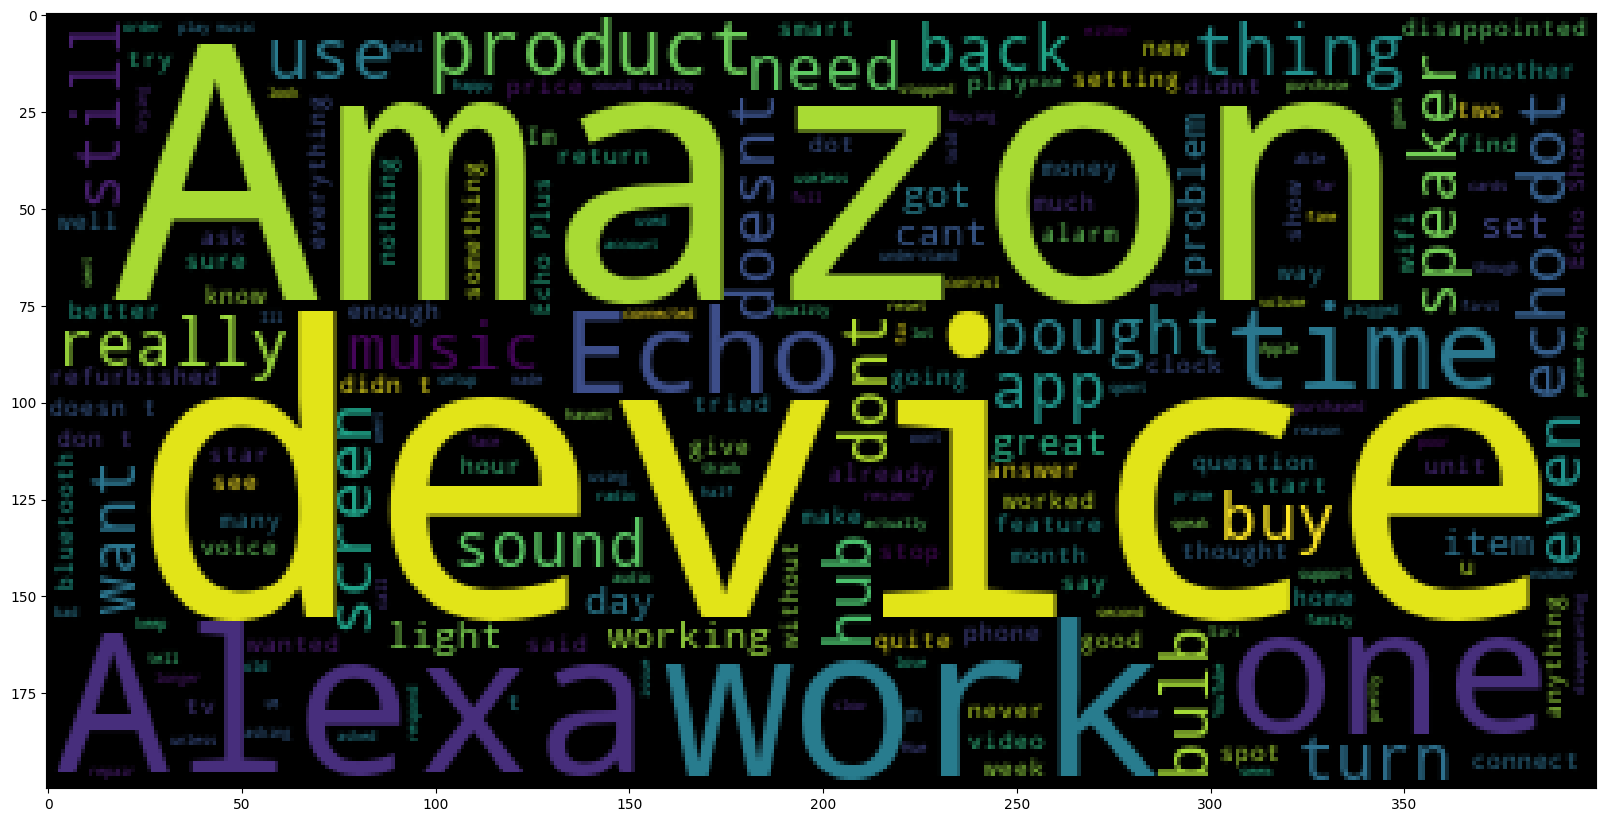

In [ ]:
plt.figure(figsize=(20,20))
plt.imshow(WordCloud().generate(neg_clean_string))

Most commonly used words in negative feedback are device, Echo, Alexa, Amazon, one...

## Preprocessing

To build the corpus from the 'verified_reviews' we perform:
1. Replacing any non alphabetic characters with space
2. Converting to lower case and splitting into words
3. Iterate over the individual words and if it is not a stopword then adding the stemmed form of the word to the corpus

In [ ]:
corpus=[]
stemmer=PorterStemmer()
for i in range(0,df.shape[0]):
    review=re.sub('[^a-zA-Z]',' ',df.iloc[i]['verified_reviews'])
    review=review.lower().split()
    review=[stemmer.stem(word) for word in review if not word in STOPWORDS]
    review=' '.join(review)
    corpus.append(review)

Using CountVectorizer to create bag of words

In [ ]:
cv=CountVectorizer(max_features=2500)

X=cv.fit_transform(corpus).toarray()
y=df['feedback'].values

In [ ]:

import pickle

directory = 'Models'
file_path = os.path.join(directory, 'countVectorizer.pkl')

if not os.path.exists(directory):
    os.makedirs(directory)

pickle.dump(cv, open(file_path, 'wb'))

In [ ]:
X.shape

(3150, 2500)

In [ ]:
y.shape

(3150,)

In [ ]:
#splitting the data into train and test set

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)

In [ ]:
#scaling the data so that values are between 0 and 1
scaler=MinMaxScaler()

X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.fit_transform(X_test)

In [ ]:
pickle.dump(scaler,open('Models/scaler.pkl','wb'))

## Training multiple models and summarizing their performance

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score

# Define models
log_clf = LogisticRegression()
nb_clf = MultinomialNB()
svc_clf = SVC(probability=True)  # Ensure probability=True for SVC to get predict_proba
rf_clf = RandomForestClassifier()
gb_clf = GradientBoostingClassifier()

# Train models
log_clf.fit(X_train_scaled, y_train)
nb_clf.fit(X_train_scaled, y_train)
svc_clf.fit(X_train_scaled, y_train)
rf_clf.fit(X_train_scaled, y_train)
gb_clf.fit(X_train_scaled, y_train)

# List of models and their names
models = [log_clf, nb_clf, svc_clf, rf_clf, gb_clf]
model_names = ["Logistic Regression", "Naive Bayes", "SVM", "Random Forest", "Gradient Boosting"]
metrics = []

# Loop through each model and calculate metrics
for model, name in zip(models, model_names):
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else model.decision_function(X_test)

    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_prob)

    metrics.append((name, precision, recall, f1, auc))

# Create a DataFrame to display the results
metrics_df = pd.DataFrame(metrics, columns=["Model", "Precision", "Recall", "F1-Score", "AUC-ROC"])
metrics_df


,Model,Precision,Recall,F1-Score,AUC-ROC
0,Logistic Regression,0.941046,0.987165,0.963554,0.922059
1,Naive Bayes,0.917204,0.995333,0.954673,0.776360
2,SVM,0.906878,1.000000,0.951165,0.860381
3,Random Forest,0.939866,0.984831,0.961823,0.901069
4,Gradient Boosting,0.926616,0.987165,0.955932,0.853168


This indicated that Random Forest and Logistic Regression models are performing well. Ensembling both might give even better model

In [ ]:
ensemble_model = VotingClassifier(estimators=[
    ('log_reg', log_clf),
    ('random_forest', rf_clf)
], voting='soft')

ensemble_model.fit(X_train, y_train)


VotingClassifier(estimators=[('log_reg', LogisticRegression()),
                             ('random_forest', RandomForestClassifier())],
                 voting='soft')

Precision: 0.94
Recall: 1.00
F1-Score: 0.97
AUC-ROC: 0.69


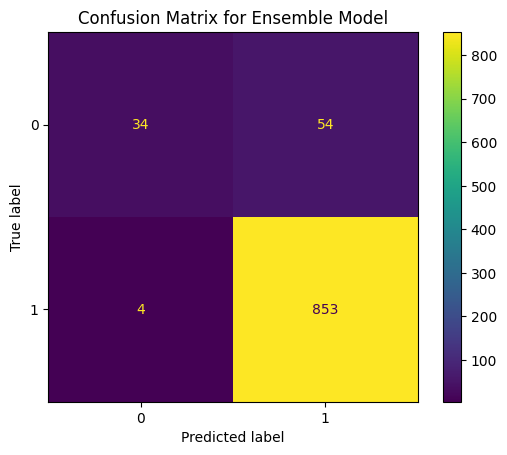

In [ ]:
ensemble_model_pred = ensemble_model.predict(X_test)

precision = precision_score(y_test, ensemble_model_pred)
recall = recall_score(y_test, ensemble_model_pred)
f1 = f1_score(y_test, ensemble_model_pred)
auc = roc_auc_score(y_test, ensemble_model_pred)

print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1:.2f}")
print(f"AUC-ROC: {auc:.2f}")

cm = confusion_matrix(y_test, ensemble_model_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='viridis')
plt.title('Confusion Matrix for Ensemble Model')
plt.show()


Considering all models Random Forest seems to be the best!!

Performing Hyperparameter tuning to improve Random forest performance

In [ ]:
param_dist = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

In [ ]:
random_search = RandomizedSearchCV(
    estimator=rf_clf,
    param_distributions=param_dist,
    n_iter=30,
    cv=3,
    scoring='f1',
    n_jobs=-1,
    random_state=42
)

In [ ]:
random_search.fit(X_train_scaled, y_train)

RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_iter=30,
                   n_jobs=-1,
                   param_distributions={'max_depth': [None, 10, 20],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [50, 100, 200]},
                   random_state=42, scoring='f1')

In [ ]:
best_params = random_search.best_params_
best_rf_model = random_search.best_estimator_
print(f"Best Parameters: {best_params}")

Best Parameters: {'n_estimators': 50, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': None}


In [ ]:
y_pred = best_rf_model.predict(X_test)

In [ ]:
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
auc = roc_auc_score(y_test, y_prob)
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1:.2f}")
print(f"AUC-ROC: {auc:.2f}")

Precision: 0.95
Recall: 0.98
F1-Score: 0.97
AUC-ROC: 0.85
